# Decision Tree

Decision tree is a graphical representation of all the possible outcomes of a decision based on the input data. It is a powerful tool for modeling and predicting outcomes.A decision tree is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm. It is a versatile supervised machine-learning algorithm, which is used for both classification and regression problems.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("HeartDisease.csv")

In [3]:
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


([<matplotlib.patches.Wedge at 0x29959772f10>,
 [Text(-0.15904754499681734, 1.1288506891659702, 'Heart Disease'),
  Text(0.15486218619567124, -1.0991440775834156, 'No Heart Disease')],
 [Text(-0.08928984982277462, 0.6337407377773867, '54.5%'),
  Text(0.0851044446660896, -0.6040341327260211, '45.5%')])

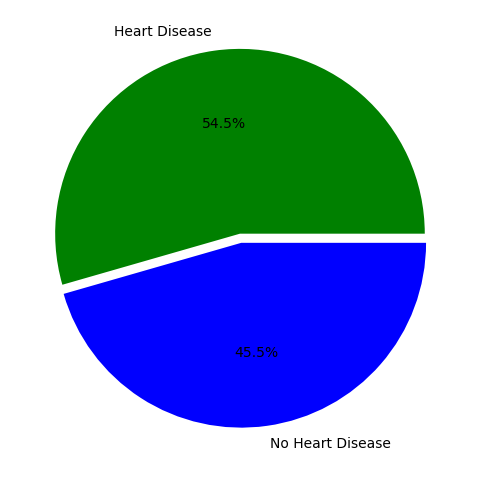

In [5]:
plt.figure(figsize=(13,6))
sizes=data["target"].value_counts().values
labels=["Heart Disease","No Heart Disease"]
explode=[0.04,.01]
color=["green","blue"]
plt.pie(sizes,explode,labels,color,autopct='%1.1f%%')

<Axes: xlabel='gender', ylabel='count'>

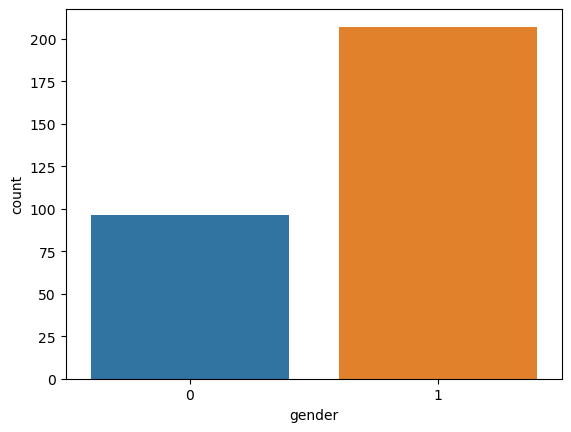

In [6]:
sns.countplot(x="gender",data=data)

0 denotes =Male,1 denotes=Female


<Axes: xlabel='thalassemia', ylabel='count'>

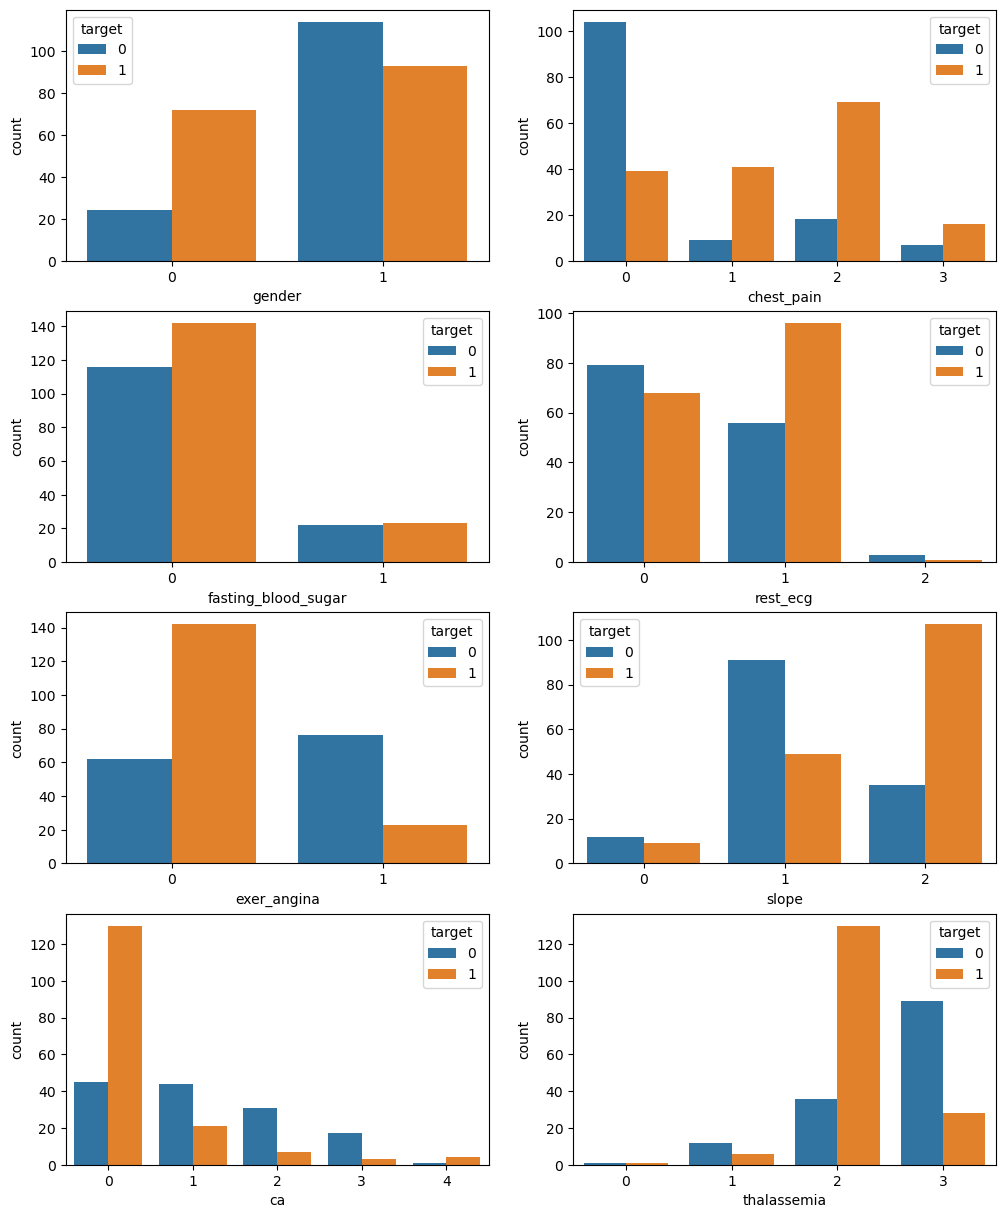

In [7]:
fig,ax=plt.subplots(4,2,figsize=(12,15))
sns.countplot(x="gender",hue='target',data=data,ax=ax[0][0])
sns.countplot(x='chest_pain',hue='target',data=data,ax=ax[0][1])
sns.countplot(x="fasting_blood_sugar",hue="target",data=data,ax=ax[1][0])
sns.countplot(x='rest_ecg',hue='target',data=data,ax=ax[1][1])
sns.countplot(x="exer_angina",hue="target",data=data,ax=ax[2][0])
sns.countplot(x='slope',hue='target',data=data,ax=ax[2][1])
sns.countplot(x="ca",hue="target",data=data,ax=ax[3][0])
sns.countplot(x='thalassemia',hue='target',data=data,ax=ax[3][1])

#### Insights:
From above countplot we can analyse that the number of heart diseases in male is higher than the number of heart disease in females

People who are on 3rd level of chest pain are very less as compared to people who are on 2nd level of chest pain.

When rest ecg is 1 then person have more chances of suffering from heart disease and when rest ecg 2 then person have least chances of heart disease.

People having fpd>135 is having more chance of heart disease than people having fps<120


<Axes: xlabel='gender', ylabel='cholestrol'>

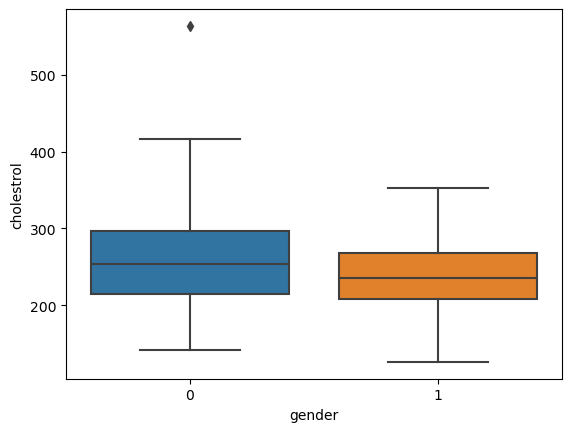

In [8]:
sns.boxplot(x="gender",y="cholestrol",data=data)

Cholestrol level of male is higher than the cholestrol level of female

# Feature Selection

In [9]:
data.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [10]:
data.drop(["old_peak","exer_angina"],axis=1,inplace=True)

# Model Evaluation

In [11]:
from sklearn.model_selection import train_test_split

x=data.drop("target",axis=1)
y=data["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=56) 

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((212, 11), (91, 11), (212,), (91,))

# Model Building

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [14]:
#fit the training data on decision tree model
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
pred=dt.predict(x_test)
pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

# Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,classification_report
print("Accuracy score:", accuracy_score(y_test,pred))
print("f1-score:",f1_score(y_test,pred))
print("auc score:",roc_auc_score(y_test,pred))

Accuracy score: 0.8351648351648352
f1-score: 0.8421052631578948
auc score: 0.8347826086956522


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        45
           1       0.82      0.87      0.84        46

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

